# Basic Python

In [1]:
#functions, loops, conditions
def f(x):
    if x > 0:
        return x * f(x - 1)
    elif x == 0:
        return 1
    else:
        raise ValueError
        
for i in range(10):
    print(i, f(i))

(0, 1)
(1, 1)
(2, 2)
(3, 6)
(4, 24)
(5, 120)
(6, 720)
(7, 5040)
(8, 40320)
(9, 362880)


In [2]:
#lists
a = [1, 2, 3]
b = [4, 5, 6]
print(a + b)

[1, 2, 3, 4, 5, 6]


In [3]:
#dictionaries
x = {'a': 1, 'b': 2}
print(x['a'])

1


# Numpy: handling arrays

In [4]:
import numpy as np

x = np.random.randint(10, size=(3,3))
print(x)

[[2 6 4]
 [3 1 6]
 [3 7 1]]


In [5]:
print(x[:2,:2])

[[2 6]
 [3 1]]


In [6]:
print(x[x>5])

[6 6 7]


In [7]:
print(np.sum(x[:2,0]))

5


In [8]:
a = np.array([1, 2, 3])
b = np.array([3, 4, 5])
print(a + b)

[4 6 8]


# Matplotlib: visualizing data

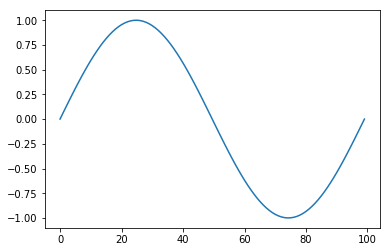

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.sin(np.linspace(0, 2*np.pi, 100))
plt.plot(x)
plt.show()

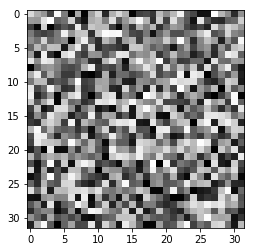

In [10]:
x = np.random.random((32, 32))
plt.imshow(x, cmap='gray')
plt.show()

# Loading images with Pillow

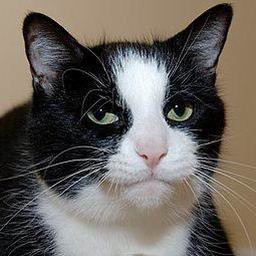

In [11]:
from PIL import Image

Image.open('cat.jpg')

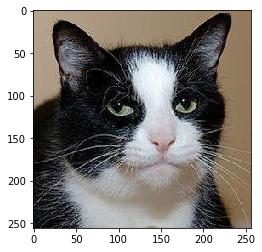

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<type 'numpy.ndarray'>
uint8


In [12]:
img1 = Image.open('cat.jpg')
img2 = np.asarray(img1)
plt.imshow(img1)
plt.show()
print(type(img1))
print(type(img2))
print(img2.dtype)

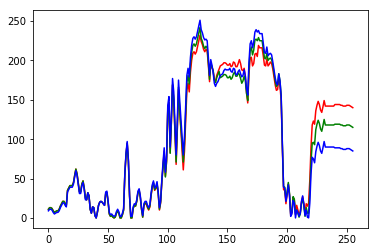

In [13]:
d = 150
plt.plot(img2[d,:,0], 'r')
plt.plot(img2[d,:,1], 'g')
plt.plot(img2[d,:,2], 'b')
plt.show()

# Machine learning with scikit-learn

In [14]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


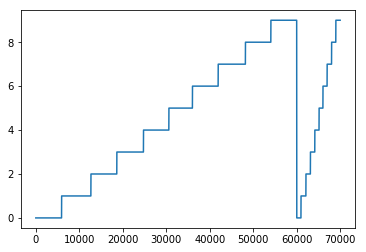

In [15]:
plt.plot(mnist.target)
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

idx = np.random.permutation(len(mnist.target))
train_idx = idx[:1000]
test_idx = idx[-1000:]
X_train = mnist.data[train_idx]
y_train = mnist.target[train_idx]
X_test = mnist.data[test_idx]
y_test = mnist.target[test_idx]

In [17]:
%%time
clf.fit(X_train, y_train)

CPU times: user 538 ms, sys: 10.6 ms, total: 549 ms
Wall time: 548 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
p = clf.predict(X_train)
print(np.mean(p == y_train))

1.0


In [19]:
p = clf.predict(X_test)
print(np.mean(p == y_test))

0.833


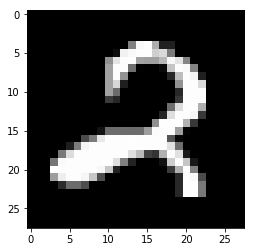

true label: 2, predicted: 2



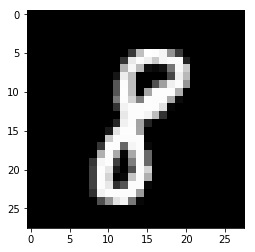

true label: 8, predicted: 8



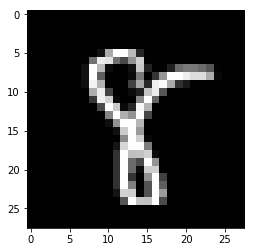

true label: 8, predicted: 1



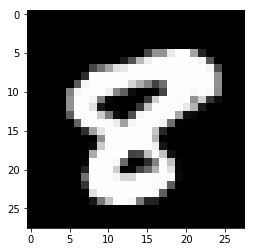

true label: 8, predicted: 8



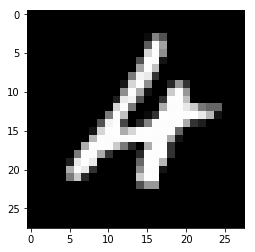

true label: 4, predicted: 6



In [20]:
for k in range(5):
    plt.imshow(X_test[k].reshape((28, 28)), cmap='gray')
    plt.show()
    print("true label: %d, predicted: %d" % (y_test[k], p[k]))
    print("")

# Keras

In [21]:
import keras

Using TensorFlow backend.


In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

input_shape = (28, 28, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=32,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 1000 samples, validate on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 5s - loss: 10.9801 - acc: 0.2570 - val_loss: 7.5329 - val_acc: 0.4620
Epoch 2/10
1000/1000 [==============================] - 5s - loss: 7.3561 - acc: 0.4530 - val_loss: 5.5010 - val_acc: 0.5790
Epoch 3/10
1000/1000 [==============================] - 5s - loss: 3.7495 - acc: 0.6260 - val_loss: 1.0813 - val_acc: 0.7990
Epoch 4/10
1000/1000 [==============================] - 5s - loss: 1.3183 - acc: 0.7240 - val_loss: 0.5923 - val_acc: 0.8380
Epoch 5/10
1000/1000 [==============================] - 5s - loss: 0.9300 - acc: 0.7730 - val_loss: 0.5051 - val_acc: 0.8610
Epoch 6/10
1000/1000 [==============================] - 5s - loss: 0.7109 - acc: 0.7920 - val_loss: 0.4399 - val_acc: 0.8780
Epoch 7/10
1000/1000 [==============================] - 5s - loss: 0.5186 - acc: 0.8510 - val_loss: 0.3711 - val_acc: 0.9080
Epoch 8/10
1000/1000 [==============================] - 5s - loss: 0.5300 - 